In [1]:
from bs4 import BeautifulSoup
import requests
import pandas
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

# Salva os dados
Pule esse passo se a data for posterior a 02/03/2018

In [2]:
pages = {'notas_testes.htm': 'http://www.vestibular.ita.br/_notas/notas_testes.htm',
        'notas_finais.htm': 'http://www.vestibular.ita.br/_notas/notas_finais.htm'}

files = os.listdir()

for i in pages.keys():
    if i not in files:
        print('Downloading', i)
        r = requests.get(pages[i])
        with open(i, 'w') as arq:
            arq.write(r.text)
    else:
        print(i, 'already exists.')

notas_finais.htm already exists.
notas_testes.htm already exists.


# Parsing das notas dos testes

In [3]:
try:
    print("Reading notas_testes.htm", end="")
    arq = open('notas_testes.htm', 'r')
    content = arq.read()
    print(" - DONE")
except:
    print("File notas_testes.htm does'nt exists.")
finally:
    arq.close()

Reading notas_testes.htm - DONE


In [4]:
soup = BeautifulSoup(content, 'html5lib')
data = soup.findAll('pre')
headers = ''
headers += data[0].get_text().replace('-', '')
headers = headers.replace('Í', 'I').replace('É', 'E').replace('Ú', 'U').replace('\n', '')
headers = headers.replace('RO', 'RO.').replace('CPF', 'CPF.').replace('IA', 'IA.').replace(' ', '')
headers = headers.replace('.', ';') + ';'
print(headers)

NUMERO;CPF;FIS;INGL;PORT;MAT;QUIM;MEDIA;OBS;


In [5]:
notas = ''
notas += data[1].get_text().replace('         \n', '(Presente)\n').replace(',','.')
notas = notas.replace('  ', ';').replace(' ', '').replace('--', '')[:-2]
for i in notas.split('\n')[:9]:
    print(i)


00001;033.756.902-90;0.00;0.00;0.00;0.00;0.00;0.0000;(Ausente)
00002;018.417.962-98;3.00;0.00;0.00;0.00;0.00;0.0000;(Ausente)
00003;030.909.172-11;0.00;0.00;0.00;0.00;0.00;0.0000;(Ausente)
00004;424.498.658-88;1.00;6.50;7.50;3.00;4.50;4.0000;(Presente)
00005;032.912.372-69;2.50;5.00;6.50;4.00;2.00;3.7500;(Presente)
00006;053.940.432-21;0.00;0.00;0.00;0.00;0.00;0.0000;(Ausente)
00007;029.345.042-04;0.00;0.00;0.00;0.00;0.00;0.0000;(Ausente)
00008;052.986.922-57;1.50;0.00;0.00;0.00;0.00;0.0000;(Ausente)


In [6]:
with open('notas_testes.csv', 'w') as arq:
    arq.write(headers+notas)

# Parsing das notas finais

In [7]:
try:
    print("Reading notas_finais.htm", end="")
    arq = open('notas_finais.htm', 'r')
    content = arq.read()
    print(" - DONE")
except:
    print("File notas_finais.htm does'nt exists.")
finally:
    arq.close()

Reading notas_finais.htm - DONE


In [8]:
soup = BeautifulSoup(content, 'html5lib')
data = soup.findAll('pre')
data = [i.get_text().replace('--', '').replace('+', '').replace('|', '') for i in data]
data = [i.replace('NOTAS DA PARTE DISSERTATIVA', '').replace('NOTAS FINAIS', '') for i in data]
data = [i.replace('NUMERO       CPF         FIS.  REDACAO   MAT.  QUIM.   FIS.  INGL.  PORT.   MAT.  QUIM.   MEDIA', 
                  'NUMERO;CPF;FIS2;REDACAO;MAT2;QUIM2;FIS;INGL;PORT;MAT;QUIM;MEDIA;') for i in data]
data = [i.replace('\n\n', '\n').replace('CLASSIF.  ', 'CLASSIF;') for i in data]
for i in range(10):
    data = [j.replace(str(i)+' ', str(i)+';') for j in data]
data = [i.replace(' ', '').replace('\n\n', '').replace(',', '.') for i in data]
for i in data:
    for j in i.split(';\n')[:10]:
        print(j)


CLASSIF;NUMERO;CPF;FIS2;REDACAO;MAT2;QUIM2;FIS;INGL;PORT;MAT;QUIM;MEDIA
0001;01739;107.526.164-39;8.60;5.90;8.00;8.10;8.30;8.00;8.36;8.75;8.55;8.4900
0002;09034;158.253.327-07;9.20;8.70;7.10;7.70;8.85;9.50;8.88;7.30;8.10;8.2825
0003;01078;862.706.085-11;9.00;4.80;7.70;8.00;8.75;8.50;7.62;8.35;8.25;8.2425
0004;03343;058.061.571-56;8.70;4.40;6.90;8.10;8.60;9.50;7.76;8.20;8.30;8.2150
0005;08382;069.703.195-04;8.10;7.00;8.00;7.50;7.55;9.00;8.20;8.75;8.25;8.1875
0006;01667;066.303.903-77;8.60;4.80;6.70;7.30;9.05;8.00;7.32;7.85;8.15;8.0925
0007;08807;106.195.666-04;9.60;5.60;6.50;8.00;9.30;9.00;7.94;7.75;7.25;8.0600
0008;01337;701.672.964-85;8.10;5.20;6.90;7.40;7.80;8.00;7.78;8.45;8.20;8.0575
0009;01445;060.923.213-43;8.60;4.00;9.00;7.10;8.30;6.50;7.30;9.25;7.30;8.0375

CLASSIF;NUMERO;CPF;FIS2;REDACAO;MAT2;QUIM2;FIS;INGL;PORT;MAT;QUIM;MEDIA
0001;01637;102.542.964-83;8.40;4.80;6.70;8.00;8.45;8.00;7.32;7.60;8.25;7.9050
0002;01548;072.293.473-43;7.80;4.20;7.60;6.90;7.90;5.50;7.38;8.55;7.70;7.8

In [9]:
with open('notas_finais_ordinarias.csv', 'w') as arq:
    arq.write(data[0])
    
with open('notas_finais_privativas.csv', 'w') as arq:
    arq.write(data[1])

with open('notas_finais_nao_habilitados.csv', 'w') as arq:
    arq.write(data[2])

with open('notas_finais_treineiros.csv', 'w') as arq:
    arq.write(data[3])

# Algumas plotagens

In [10]:
dataframe = pandas.read_csv('notas_testes.csv', sep=';')

In [11]:
dataframe = dataframe.drop(['NUMERO','CPF', 'Unnamed: 9'], axis=1)
dataframe = dataframe[dataframe.OBS != '(Ausente)']
dataframe.sample(10)

,FIS,INGL,PORT,MAT,QUIM,MEDIA,OBS
7390,1.0,3.0,5.0,6.0,3.5,3.875,(Presente)
3973,4.0,2.5,6.0,8.5,6.5,6.250,(Presente)
6838,1.0,8.5,5.5,1.5,2.5,2.625,(Presente)
10341,4.0,8.0,7.5,5.0,3.5,5.000,(Presente)
1946,4.5,6.5,9.5,4.5,5.5,6.000,(Presente)
7201,2.5,7.0,7.0,4.0,2.5,4.000,(Presente)
11031,3.0,5.5,6.5,2.5,3.0,3.750,(Presente)
4183,6.0,8.0,9.0,7.5,8.0,7.625,(Presente)
2839,2.0,7.0,9.0,3.0,3.5,4.375,(Presente)
8308,3.0,4.0,3.5,3.0,2.0,2.875,(Presente)


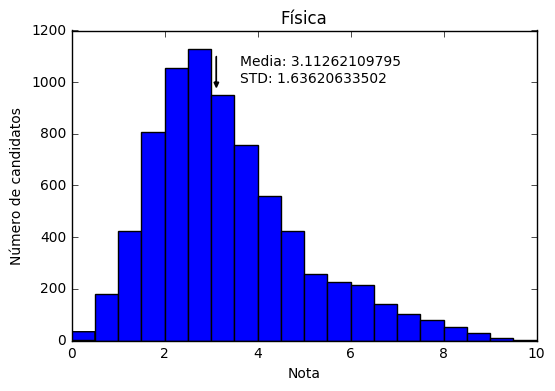

In [12]:
fig_FIS = plt.figure()

FIS = dataframe.FIS.values
media_FIS = np.mean(FIS)
std_FIS = np.std(FIS)

ax = fig_FIS.add_subplot(111)
ax.set_title('Física')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_FIS)+'\nSTD: '+str(std_FIS), xy=(media_FIS+0.5, 1000), xytext=(media_FIS+0.5, 1000),)
ax.arrow(media_FIS, 1100, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(FIS, 20)

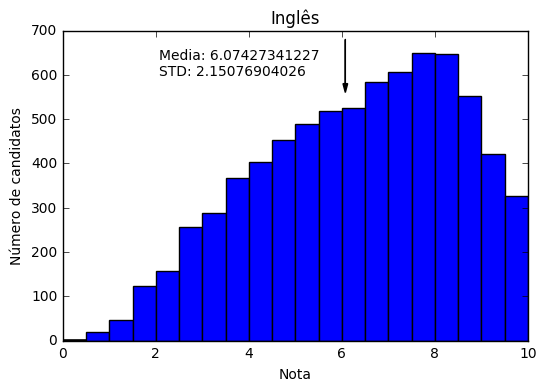

In [13]:
fig_INGL = plt.figure()

INGL = dataframe.INGL.values
media_INGL = np.mean(INGL)
std_INGL = np.std(INGL)

ax = fig_INGL.add_subplot(111)
ax.set_title('Inglês')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_INGL)+'\nSTD: '+str(std_INGL), xy=(media_INGL-4, 600), xytext=(media_INGL-4, 600),)
ax.arrow(media_INGL, 680, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(INGL, 20)

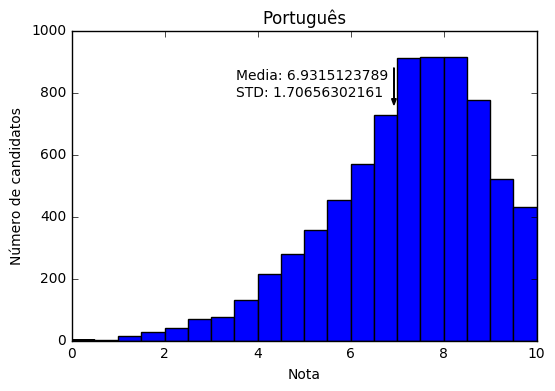

In [14]:
fig_PORT = plt.figure()

PORT = dataframe.PORT.values
media_PORT = np.mean(PORT)
std_PORT = np.std(PORT)

ax = fig_PORT.add_subplot(111)
ax.set_title('Português')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_PORT)+'\nSTD: '+str(std_PORT), xy=(media_PORT-3.4, 790), xytext=(media_PORT-3.4, 790),)
ax.arrow(media_PORT, 880, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(PORT, 20)

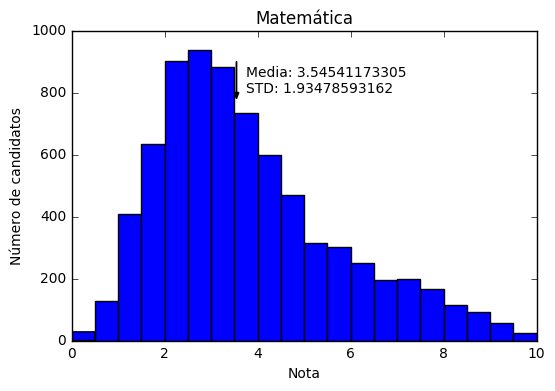

In [15]:
fig_MAT = plt.figure()

MAT = dataframe.MAT.values
media_MAT = np.mean(MAT)
std_MAT = np.std(MAT)

ax = fig_MAT.add_subplot(111)
ax.set_title('Matemática')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_MAT)+'\nSTD: '+str(std_MAT), xy=(media_MAT+0.2, 800), xytext=(media_MAT+0.2, 800),)
ax.arrow(media_MAT, 900, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(MAT, 20)

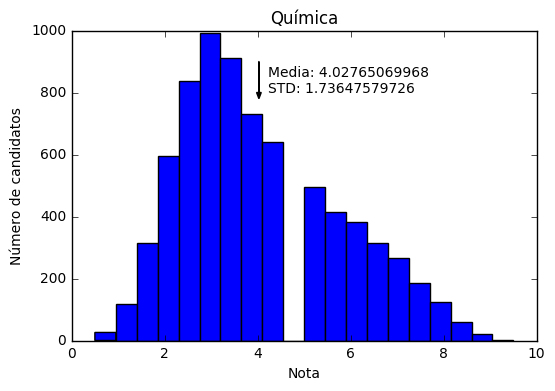

In [16]:
fig_QUIM = plt.figure()

QUIM = dataframe.QUIM.values
media_QUIM = np.mean(QUIM)
std_QUIM = np.std(QUIM)

ax = fig_QUIM.add_subplot(111)
ax.set_title('Química')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_QUIM)+'\nSTD: '+str(std_QUIM), xy=(media_QUIM+0.2, 800), xytext=(media_QUIM+0.2, 800),)
ax.arrow(media_QUIM, 900, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(QUIM, 20)

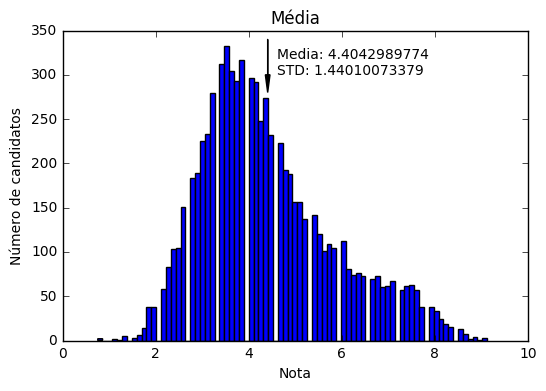

In [22]:
fig_MEDIA = plt.figure()

MEDIA = dataframe.MEDIA.values
media_MEDIA = np.mean(MEDIA)
std_MEDIA = np.std(MEDIA)

ax = fig_MEDIA.add_subplot(111)
ax.set_title('Média')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_MEDIA)+'\nSTD: '+str(std_MEDIA), xy=(media_MEDIA+0.2, 300), xytext=(media_MEDIA+0.2, 300),)
ax.arrow(media_MEDIA, 340, 0, -40, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(MEDIA, 80)

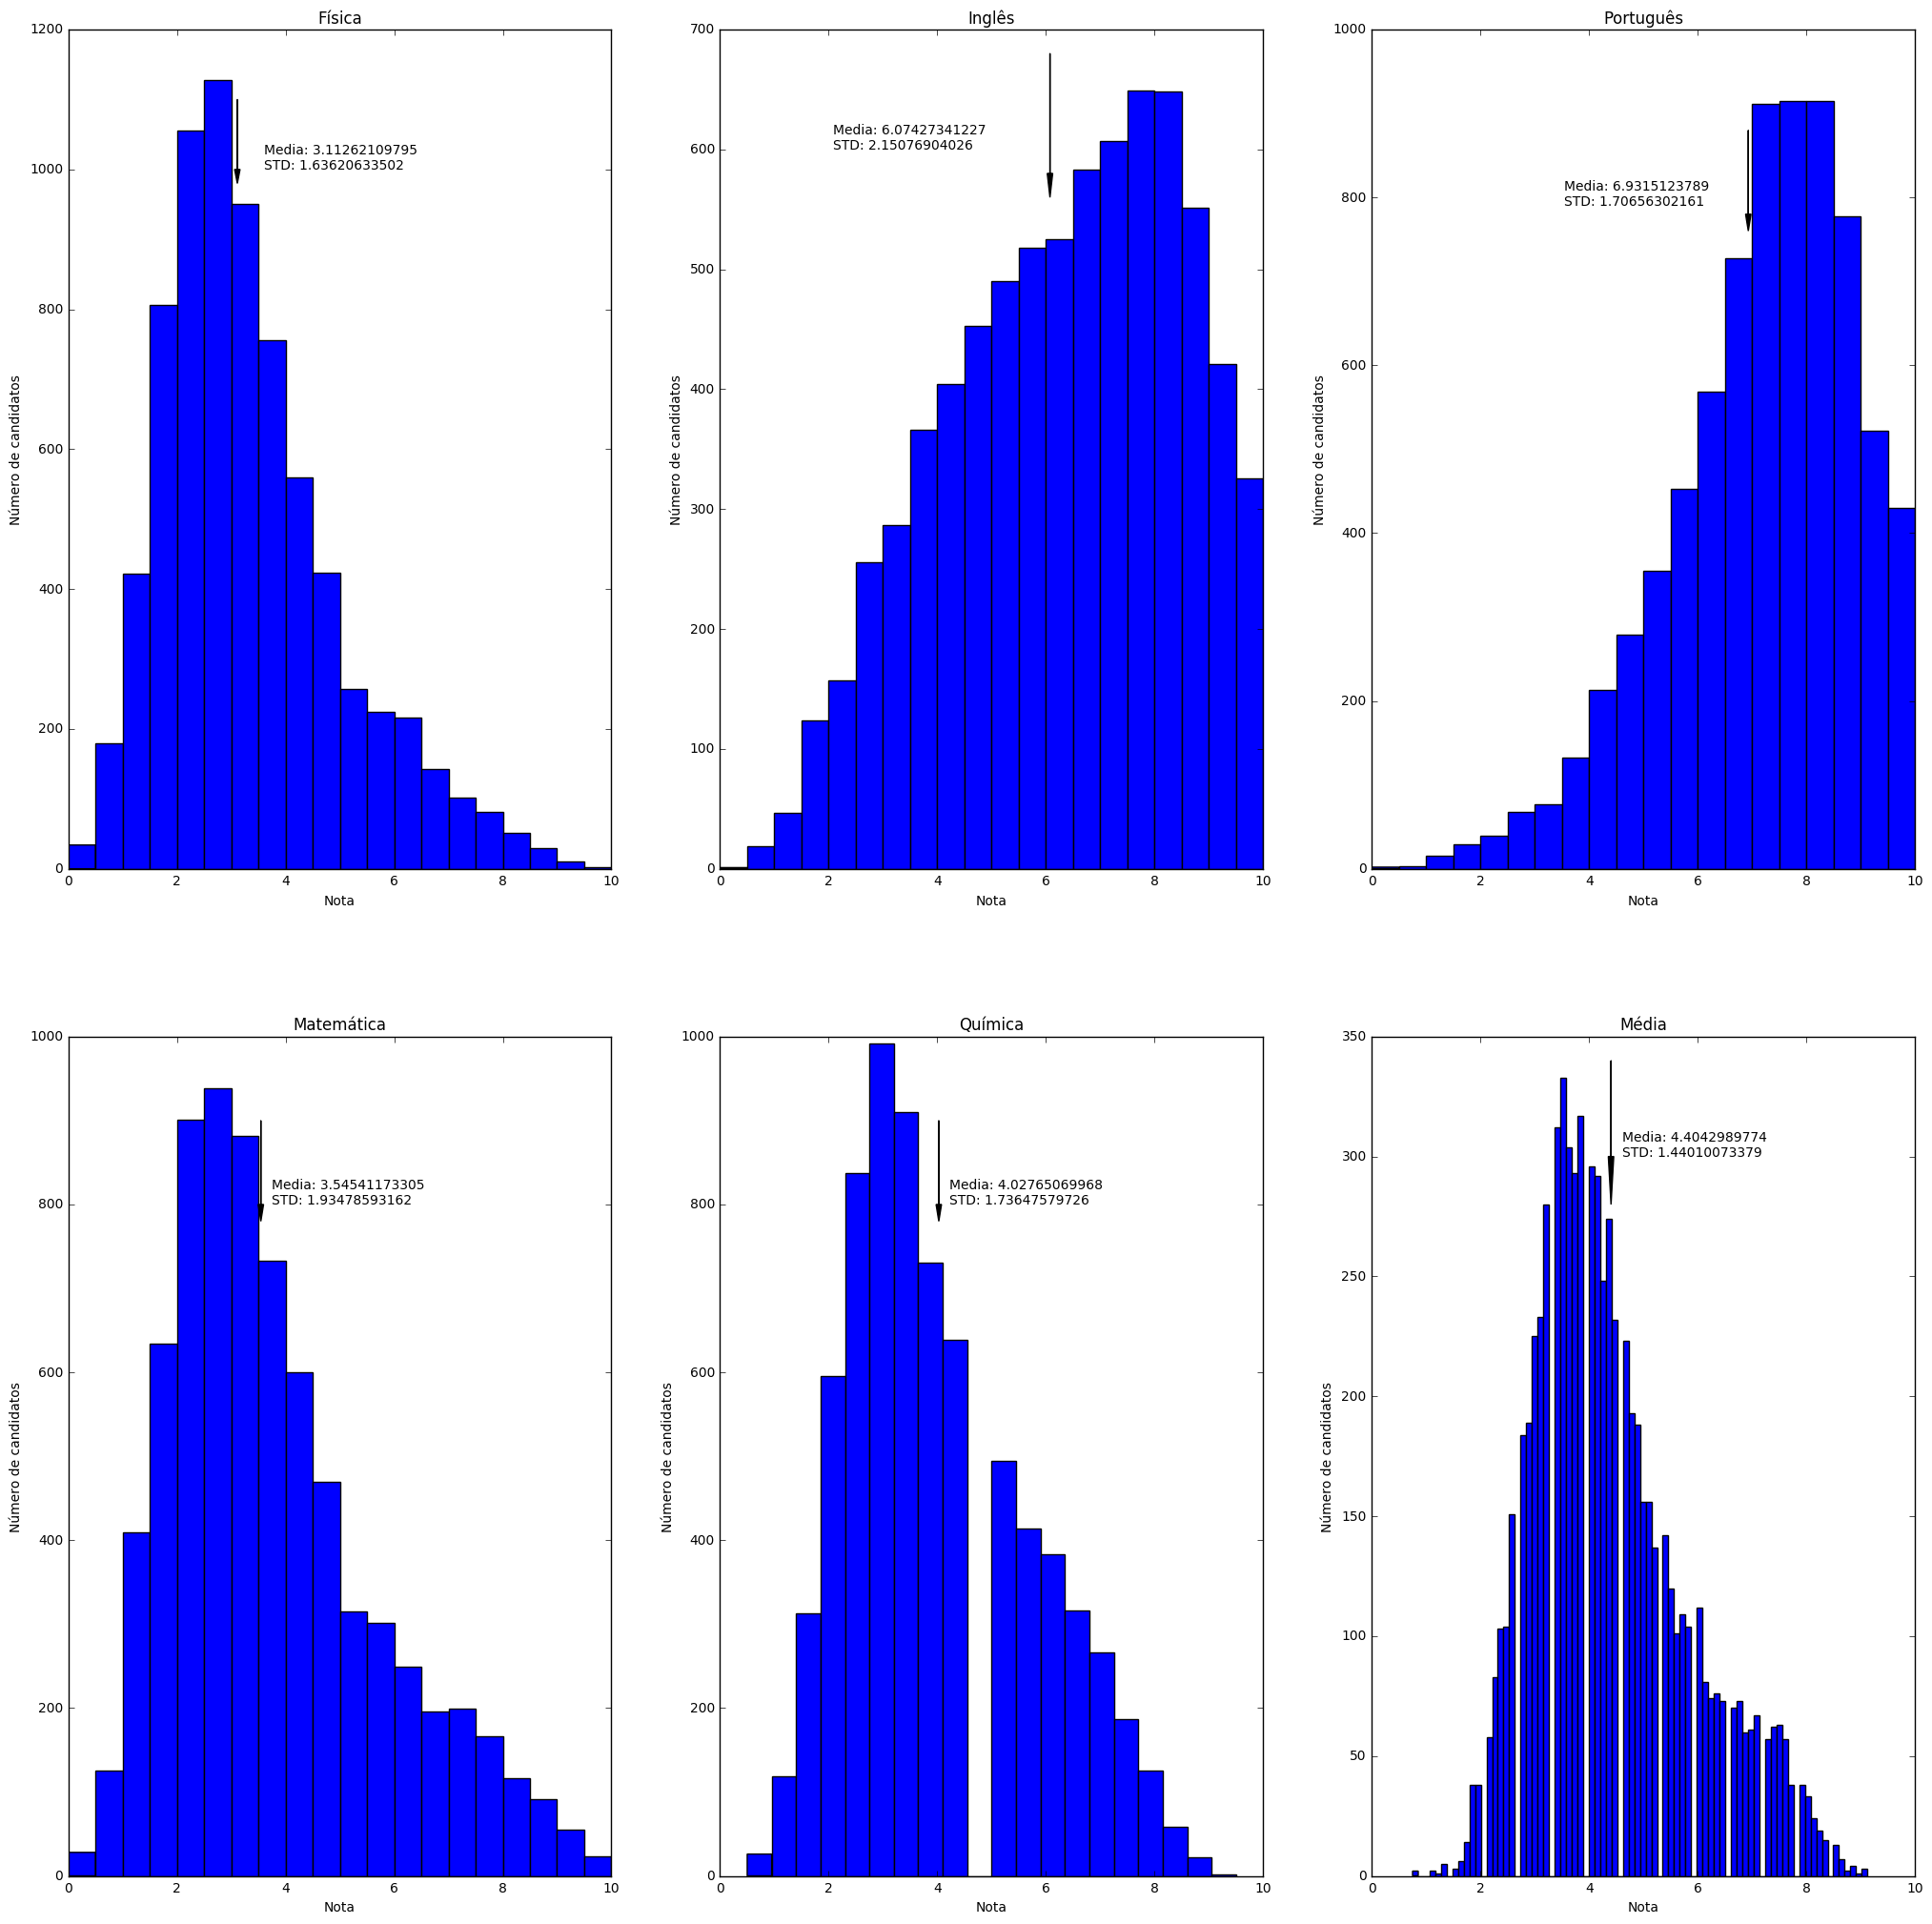

In [23]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(2,3,1)
ax.set_title('Física')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_FIS)+'\nSTD: '+str(std_FIS), xy=(media_FIS+0.5, 1000), xytext=(media_FIS+0.5, 1000),)
ax.arrow(media_FIS, 1100, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(FIS, 20)

ax = fig.add_subplot(2,3,2)
ax.set_title('Inglês')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_INGL)+'\nSTD: '+str(std_INGL), xy=(media_INGL-4, 600), xytext=(media_INGL-4, 600),)
ax.arrow(media_INGL, 680, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(INGL, 20)

ax = fig.add_subplot(2,3,3)
ax.set_title('Português')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_PORT)+'\nSTD: '+str(std_PORT), xy=(media_PORT-3.4, 790), xytext=(media_PORT-3.4, 790),)
ax.arrow(media_PORT, 880, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(PORT, 20)

ax = fig.add_subplot(2,3,4)
ax.set_title('Matemática')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_MAT)+'\nSTD: '+str(std_MAT), xy=(media_MAT+0.2, 800), xytext=(media_MAT+0.2, 800),)
ax.arrow(media_MAT, 900, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(MAT, 20)

ax = fig.add_subplot(2,3,5)
ax.set_title('Química')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_QUIM)+'\nSTD: '+str(std_QUIM), xy=(media_QUIM+0.2, 800), xytext=(media_QUIM+0.2, 800),)
ax.arrow(media_QUIM, 900, 0, -100, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(QUIM, 20)

ax = fig.add_subplot(2,3,6)
ax.set_title('Média')
ax.set_xlabel('Nota')
ax.set_ylabel('Número de candidatos')
ax.annotate('Media: '+str(media_MEDIA)+'\nSTD: '+str(std_MEDIA), xy=(media_MEDIA+0.2, 300), xytext=(media_MEDIA+0.2, 300),)
ax.arrow(media_MEDIA, 340, 0, -40, head_width=0.1, head_length=20, fc='k', ec='k')
n, bins, patches, = ax.hist(MEDIA, 80)